In [459]:
!which python

/home/wangling/miniconda3/envs/p4ds-env/bin/python


In [460]:
#!conda install -y seaborn plotly

# Final project: Phân tích dữ liệu Data Engineer Jobs
Các thành viên:

1. Phạm Thị Hoài Hiền - 18120178

2. Vương Thị Ngọc Linh - 18120195

In [461]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import re 
import plotly.express as px

In [462]:
#plt.style.use('seaborn')

## Giới thiệu về dữ liệu

Đây là bộ dữ liệu về việc làm Data Engineer và một số vị trí liên quan, link Kaggle lấy dữ liệu: https://www.kaggle.com/andrewmvd/data-engineer-jobs

Datatset này được tạo bởi Picklesueat và nó chứa hơn 2500 công việc liên quan vị trí Data Engineer.

Dataset gồm có 15 cột:
- Job Tile: Tên vị trí
- Salary Estimate: Mức lương
- Job Description: Miêu tả vị trí
- Rating: Xếp hạng công ty tuyển dụng
- Company name: Tên công ty tuyển dụng
- Location: Địa chỉ nơi làm việc
- Headquarters: Trụ sở của công ty
- Size: Quy mô nhân lực của công ty
- Founded: Năm thành lập công ty
- Type of ownership: Quyền sở hữu
- Industry: Lĩnh vực hoạt động của công ty
- Sector: Lĩnh vực chuyên ngành mà công ty phát triển.
- Revenue: Doanh thu mỗi năm của công ty.
- Competitors: Đối thủ cạnh tranh của công ty.
- Easy Apply: Vị trí này có dễ apply không.


## Tiền xử lí

### Đọc dữ liệu vào dataframe

In [463]:
data_engineer_jobs = pd.read_csv("DataEngineer.csv")
data_engineer_jobs.shape

(2528, 15)

In [464]:
data_engineer_jobs.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

Dataset có 2528 dòng và 15 cột, đúng như miêu tả.

### Xử lí missing value

Xem dữ liệu, có thể thấy tác giả đã đặt các giá trị thiếu thành `-1` và `Unknown / Non-Applicable` thay vì là `null` hay `nan`.
Đầu tiên chuyển các giá trị đó về thành `nan`.

In [465]:
data_engineer_jobs['Revenue'].unique()

array(['$10 to $25 million (USD)', '$25 to $50 million (USD)',
       '$5 to $10 million (USD)', 'Unknown / Non-Applicable',
       '$100 to $500 million (USD)', '$2 to $5 billion (USD)',
       '$500 million to $1 billion (USD)', '$50 to $100 million (USD)',
       '$10+ billion (USD)', '$1 to $2 billion (USD)',
       '$1 to $5 million (USD)', 'Less than $1 million (USD)',
       '$5 to $10 billion (USD)', '-1'], dtype=object)

In [466]:
data_engineer_jobs.replace({-1: np.nan, '-1': np.nan}, inplace=True)

In [467]:
data_engineer_jobs.isna().sum() / len(data_engineer_jobs) * 100

Job Title             0.000000
Salary Estimate       0.000000
Job Description       0.000000
Rating                9.256329
Company Name          0.000000
Location              0.000000
Headquarters          4.905063
Size                  4.707278
Founded              22.587025
Type of ownership     4.707278
Industry             14.952532
Sector               14.833861
Revenue               4.707278
Competitors          69.185127
Easy Apply           94.224684
dtype: float64

**Xoá các dòng bị thiếu giá trị quá nhiều**

In [468]:
data_engineer_jobs[data_engineer_jobs['Revenue'].isna()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
114,Data Engineer,$84K-$113K (Glassdoor est.),We are looking for a data engineer to manage a...,NaN,Pierce Technology Corp,"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,Data Engineer,$105K-$121K (Glassdoor est.),What You'll Do:We are looking for a data engin...,NaN,Atom Finance,"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,Data Engineer,$105K-$121K (Glassdoor est.),Job Details\n\nLevel\n\nExperienced\n\nJob Loc...,NaN,Greater New York Mutual Insurance Companies (GNY),"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,Data Engineer,$105K-$121K (Glassdoor est.),About UsSimon Data was founded in 2015 by a te...,NaN,Simondata,"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,Data Engineer,$105K-$121K (Glassdoor est.),Role Background:\n\nWere looking for agreat Da...,NaN,Carter Wellington Limited,"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,Data Engineer - Big Data-Hadoop,$30K-$60K (Glassdoor est.),Analyze and understand data sources & APIs• De...,NaN,"Object Technology Solutions, Inc. (OTSI)","Irving, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2415,"Developer, Data Engineer Big Data",$30K-$60K (Glassdoor est.),"OTSI is searching for a Developer, Data Engine...",NaN,"Object Technology Solutions, Inc. (OTSI)","Irving, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2419,Data Network Engineer,$30K-$60K (Glassdoor est.),This position will be responsible for the miss...,NaN,Brightstar Media Organization,"Grand Prairie, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2427,Data Integration Engineer II,$100K-$160K (Glassdoor est.),Job Description\nThe Data Integration Engineer...,NaN,Outsourced CIO LLC,"Arlington, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tổng cộng có 119 dòng có giá trị `Revenue` là -1, và có thể thấy các cột còn lại (trừ `Job Title`, `Salary`, `Company Name`, `Location` và `Headquaters`) đểu có giá trị -1, tức là job này và công ty này không có bất cứ thông tin nào có giá trị để đưa vào phân tích. Vì vậy ta sẽ xóa luôn các dòng này.

In [469]:
data_engineer_jobs.drop(data_engineer_jobs[data_engineer_jobs['Revenue'].isna()].index, axis=0, inplace=True)
data_engineer_jobs.shape

(2409, 15)

Dữ liệu còn lại 2409 dòng với cột Revenue không có giá trị -1 mà chỉ còn giá trị Unknown / Non-Applicable, ta sẽ xử lý chúng sau.

**Filling các hàng có cùng tên công ty**

In [470]:
data_engineer_jobs = data_engineer_jobs.sort_values(by=['Company Name','Location','Size','Industry','Sector'])
#data_engineer_jobs.head()

In [471]:
list_of_company = data_engineer_jobs['Company Name'].value_counts(sort=False)
list_of_company

NortonLifeLock\n3.7           2
Caris Life Sciences\n2.9      2
NTT DATA Corporation\n3.4     3
Catapult Systems\n4.4         2
Photon Infotech\n3.0         10
                             ..
Rice University\n4.5          1
Clearcover\n4.8               1
Very Good Security\n4.9       1
Civis Analytics\n3.2          2
Akuna Capital\n3.1            2
Name: Company Name, Length: 1369, dtype: int64

In [472]:

'''
def filling_missing_value(company):
    data_engineer_jobs[data_engineer_jobs['Company Name'] == company] = \
        data_engineer_jobs[data_engineer_jobs['Company Name'] == company].replace(np.nan, value=None, limit=list_of_company[company])
    
    
for company in list_of_company.index:
    filling_missing_value(company)

data_engineer_jobs = data_engineer_jobs.reset_index(drop=True) #do sau khi sort value thì index bị lộn xộn nên cần xếp lại
'''

"\ndef filling_missing_value(company):\n    data_engineer_jobs[data_engineer_jobs['Company Name'] == company] =         data_engineer_jobs[data_engineer_jobs['Company Name'] == company].replace(np.nan, value=None, limit=list_of_company[company])\n    \n    \nfor company in list_of_company.index:\n    filling_missing_value(company)\n\ndata_engineer_jobs = data_engineer_jobs.reset_index(drop=True) #do sau khi sort value thì index bị lộn xộn nên cần xếp lại\n"

In [473]:
data_engineer_jobs.isna().sum() / len(data_engineer_jobs) * 100

Job Title             0.000000
Salary Estimate       0.000000
Job Description       0.000000
Rating                4.773765
Company Name          0.000000
Location              0.000000
Headquarters          0.207555
Size                  0.000000
Founded              18.762972
Type of ownership     0.000000
Industry             10.751349
Sector               10.626816
Revenue               0.000000
Competitors          67.662931
Easy Apply           93.939394
dtype: float64

Cột Competitors và Easy Apply có rất nhiều missing value, và dữ liệu hai cột này cũng không cần thiết cho câu hỏi, vì vậy sẽ xóa hai cột này để làm sạch dữ liệu.

In [474]:
data_engineer_jobs = data_engineer_jobs.drop(columns=['Competitors', 'Easy Apply'])

### Xử lí các cột numeric

In [475]:
data_engineer_jobs.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue'],
      dtype='object')

Có đầy đủ các cột và nó có tên đúng như mô tả. Tiếp theo ta sẽ xem kiểu dữ liệu của cột.

In [476]:
data_engineer_jobs.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded              float64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
dtype: object

Theo lí thuyết ta sẽ phải có những cột này là kiểu numeric: `Salary Estimate`, `Rating`, `Founded`, `Size`, `Revenue`. Tuy nhiên theo kết quả trên thì các cột `Salary Estimate`, `Size` và `Revenue` chưa có đúng kiểu dữ liệu (object thay vì int hoặc float). Ta tiến hành đổi kiểu dữ liệu lại cho 3 cột này.

**Đổi kiểu dữ liệu cột `Salary Estimate`**

In [477]:
data_engineer_jobs["Salary Estimate"].unique()

array(['$54K-$104K (Glassdoor est.)', '$79K-$104K (Glassdoor est.)',
       '$28K-$53K (Glassdoor est.)', '$67K-$107K (Glassdoor est.)',
       '$59K-$135K (Glassdoor est.)', '$67K-$72K (Glassdoor est.)',
       '$45K-$76K (Glassdoor est.)', '$48K-$74K (Glassdoor est.)',
       '$80K-$150K (Glassdoor est.)', '$71K-$130K(Employer est.)',
       '$74K-$123K (Glassdoor est.)', '$52K-$63K (Glassdoor est.)',
       '$57K-$108K (Glassdoor est.)', '$94K-$166K (Glassdoor est.)',
       '$54K-$113K (Glassdoor est.)', '$55K-$105K (Glassdoor est.)',
       '$39K-$77K (Glassdoor est.)', '$67K-$126K (Glassdoor est.)',
       '$30K-$60K (Glassdoor est.)', '$27K-$50K (Glassdoor est.)',
       '$69K-$122K (Glassdoor est.)', '$77K-$181K (Glassdoor est.)',
       '$113K-$198K (Glassdoor est.)', '$46K-$92K (Glassdoor est.)',
       '$106K-$127K (Glassdoor est.)', '$140K-$151K (Glassdoor est.)',
       '$94K-$107K (Glassdoor est.)', '$43K-$84K (Glassdoor est.)',
       '$73K-$94K (Glassdoor est.)', '$65K-

Tất cả các giá trị đều được biểu diễn trong một khoảng cố định. `Glassdoor est.` là mức lương ước tính trên trang việc làm trực tuyến `Glassdoor`. 
Ta chia giá trị cột này thành 2 cột Upper và Lower, sau đó đổi giá trị của cột từ mức lương min-max thành mức lương trung bình.
Rất may là cột này không có giá trị thiếu.

In [478]:
list_upper =[]
list_lower = []
list_avg = []
def split_salary(x):
    S = [int(s) for s in re.findall(r'\d+', x)]
    list_lower.append(S[0])
    list_upper.append(S[1])
    list_avg.append((S[0] + S[1]) / 2)

for x in data_engineer_jobs["Salary Estimate"]:
    split_salary(x)

data_engineer_jobs["Salary Lower"] = list_lower
data_engineer_jobs["Salary Upper"] = list_upper

In [479]:
def find_mean_salary(x):
    S = [int(s) for s in re.findall(r'\d+', x)] #liệt kê (list) tất cả số nguyên trong x
    return (S[0] + S[1]) / 2

data_engineer_jobs["Salary Estimate"] = data_engineer_jobs["Salary Estimate"].apply(find_mean_salary)
data_engineer_jobs = data_engineer_jobs.rename(columns={"Salary Estimate": "Salary est. (thousand USD)"})

**Đổi kiểu dữ liệu cột `Size`**

In [480]:
data_engineer_jobs['Size'].unique()

array(['1 to 50 employees', '51 to 200 employees',
       '1001 to 5000 employees', '201 to 500 employees',
       '10000+ employees', '5001 to 10000 employees',
       '501 to 1000 employees', 'Unknown'], dtype=object)

Ta thấy chỉ có 7 giá trị phân biệt và 1 giá trị missing (unknown). 
Vậy ta quy đổi thành các giá trị từ 1-7 thể hiện cho quy mô tăng dần như sau:
- Mức độ 1: 1 to 50 employees
- Mức độ 2: 51 to 200 employees
- Mức độ 3: 201 to 500 employees
- Mức độ 4: 501 to 1000 employees
- Mức độ 5: 1001 to 5000 employees
- Mức độ 6: 5001 to 10000 employees
- Mức độ 7: 10000+ employees
Các giá trị unknown ta sẽ để bằng `nan`.

In [481]:
def transform_size(x):
    if x == '1 to 50 employees':
        return 1
    elif x == '51 to 200 employees':
        return 2
    elif x == '201 to 500 employees':
        return 2
    elif x == '501 to 1000 employees':
        return 4
    elif x == '1001 to 5000 employees':
        return 5
    elif x == '5001 to 10000 employees':
        return 6
    elif x == '10000+ employees':
        return 7
    else:
        return np.nan

data_engineer_jobs['Size'] = data_engineer_jobs['Size'].apply(transform_size)

**Đổi kiểu dữ liệu cột `Revenue`**

In [482]:
data_engineer_jobs['Revenue'].unique()

array(['Unknown / Non-Applicable', '$5 to $10 million (USD)',
       '$25 to $50 million (USD)', 'Less than $1 million (USD)',
       '$1 to $2 billion (USD)', '$500 million to $1 billion (USD)',
       '$10+ billion (USD)', '$50 to $100 million (USD)',
       '$100 to $500 million (USD)', '$5 to $10 billion (USD)',
       '$2 to $5 billion (USD)', '$10 to $25 million (USD)',
       '$1 to $5 million (USD)'], dtype=object)

Ta thấy có rất nhiều cách biểu diễn khác nhau cho cột này (có khoảng from..to, có con số X+, có less than). 
Do số tiền chỉ có đơn vị là triệu (million) và tỷ (billion) nên ta sẽ đổi hết giá trị về thành đơn vị tỉ đô
Đổi giá trị cột `Revenue` từ các khoảng doanh thu bằng `giá trị cao nhất (max)` trong khoảng:
- Các dòng có giá trị X+ sẽ được quy ước là X+1
- Các dòng có giá trị Less than X quy ước là X 
- Các dòng Unknown sẽ được quy ước là 0

In [483]:
def find_max_revenue(x):
    if x == 'Unknown / Non-Applicable':
        return 0
    else:
        S = [int(s) for s in re.findall(r'\d+', x)]
        if 'billion' in x and 'million' not in x:
            S = [s*1000 for s in S]
        if '+' in x:
            S.append(S[0] + 1)
        if 'Less than' in x:
            S.append(S[0])
            S[0] = 0
        return S[1]
data_engineer_jobs['Revenue'] = data_engineer_jobs['Revenue'].apply(find_max_revenue)
data_engineer_jobs = data_engineer_jobs.rename(columns={'Revenue': 'Revenue (million USD)'})

### Xử lí các cột category

Ở cột `Company Name`, ta thấy có phần "\n rating" phía sau tên công ty là dư thừa (vì đã có cột `rating` riêng), vì vậy ta xoá nó đi.

In [484]:
data_engineer_jobs['Company Name'] = data_engineer_jobs['Company Name'].str.partition("\n")

Ta xem xét một vài thống kê trong các cột category:

In [485]:
data_engineer_jobs.describe(include=[object])  

,Job Title,Job Description,Company Name,Location,Headquarters,Type of ownership,Industry,Sector
count,2409,2409,2409,2409,2404,2409,2150,2153
unique,1221,2190,1365,111,435,13,83,24
top,Data Engineer,Organization: Accenture Federal Services\n\nLo...,Amazon,"Austin, TX","New York, NY",Company - Private,IT Services,Information Technology
freq,438,7,28,195,178,1392,355,890


### Xử lí cột `Job Title`

Ở đây ta quan tâm đến 2 job là Data Engineer và Senior Data Engineer, và có rất nhiều job thuộc 2 loại này nhưng có title khác nhau, ví dụ: Big Data Engineer, Data Engineer II,... Vì vậy cần đồng bộ các title này trở về 2 loại chính. Đầu tiên là sửa lại title chứa Sr. thành Senior để dễ xử lý.

In [486]:
data_engineer_jobs['Job Title'] = data_engineer_jobs['Job Title'].str.replace('Sr.','Senior', regex=True)

Tiếp theo ta thay đổi tất cả title chứa cụm 'Data Engineer' -> Data Engineer và tương tự với Senior Data Engineer và lưu lại vào cột Job Title.

In [487]:
title = []
job_title = data_engineer_jobs['Job Title'].values
for each in job_title:
    if 'Senior Data Engineer' not in each:
        #lệnh re replace các title Data Engineer
        each = re.sub("[\w\s\S]*Data[\w\s\S]*Engineer[\w\s\S]*",'Data Engineer',each,flags=re.IGNORECASE) 
    else:
        #lệnh re thay đổi các title Senior Data Engineer
        each = re.sub("[\w\s\S]*Senior[\w\s\S]*Data[\w\s\S]*Engineer[\w\s\S]*",'Senior Data Engineer', each,flags=re.IGNORECASE)
    title.append(each)

In [488]:
data_engineer_jobs['Job Title']= title
data_engineer_jobs['Job Title'].value_counts()

Data Engineer                                                 1191
Senior Data Engineer                                           146
Software Engineer                                               90
Machine Learning Engineer                                       17
Systems Engineer                                                13
                                                              ... 
AI Engineer                                                      1
Systems Engineer SeniorStf ( Level 5)                            1
Automation Engineer                                              1
Direct Trading Support Engineer, Weekend Shift                   1
Engineer Quality Control Inspector with Security Clearance       1
Name: Job Title, Length: 745, dtype: int64

In [489]:
title = []
job_title = data_engineer_jobs['Job Title'].values
for each in job_title:
    if 'Software Engineer' in each:
        split_string = each.split("Engineer", 1)
        each = split_string[0] + ' Engineer'
    title.append(each)

In [490]:
data_engineer_jobs['Job Title']= title
data_engineer_jobs['Job Title'].value_counts()

Data Engineer                                         1191
Software  Engineer                                     172
Senior Data Engineer                                   146
Senior Software  Engineer                               39
Machine Learning Engineer                               17
                                                      ... 
AI ML Engineer                                           1
Server Engineer                                          1
Technology Solutions Engineer                            1
Modem ASIC Engineer                                      1
Campaign Data Specialist (Adobe Campaign or Unica)       1
Name: Job Title, Length: 639, dtype: int64

## Các câu hỏi cần trả lời


### 1- Mức lương trung bình của từng job là bao nhiêu? Mức lương cho Senior data là bao nhiêu?

In [491]:
AVG_salary_by_job = data_engineer_jobs[["Job Title","Salary est. (thousand USD)"]].groupby(["Job Title"]).mean().sort_values(by=['Salary est. (thousand USD)'], ascending=False)
AVG_salary_by_job



,Salary est. (thousand USD)
Job Title,
machine learning Engineer with AWS,217.5
Python Software Engineer,217.5
Validations Manager / Engineer,204.0
Data Analyst - EDSS,204.0
Software Architect (Distinguished Software Engineer,204.0
...,...
Process Optimization Engineer Assistant Vice President,38.5
Process Optimization Engineer - Assistant Vice President,38.5
Engineer Quality Control Inspector with Security Clearance,38.5


In [492]:
AVG_salary_by_job[AVG_salary_by_job.index == 'Senior Data Engineer'].values

array([[108.00684932]])

Như vậy, Senior Data Engineer có mức lương trung bình là 108 ngàn USD/năm

### 2 - Top 5 lĩnh vực tuyển dụng data engineer (tất cả các vị trí) nhiều nhất?

In [493]:
sector = data_engineer_jobs[data_engineer_jobs['Job Title'] == "Data Engineer"]['Sector'].value_counts()
sector.head(5)

Information Technology    468
Business Services         223
Finance                    99
Insurance                  39
Health Care                33
Name: Sector, dtype: int64

In [494]:
fig = px.pie(sector, names=sector[sector>10].index, values=sector[sector>10].values, title='Sector needs data jobs most',\
            width= 800, height=600, color_discrete_sequence= px.colors.qualitative.Plotly)
fig.show()

**Vậy trong mỗi lĩnh vực, số lượng tuyển dụng data engineer của các ngành nghề như thế nào?**

In [495]:
industry = data_engineer_jobs[data_engineer_jobs['Job Title'] == "Data Engineer"]
industry = industry.groupby(['Sector', 'Industry']).size().sort_values(ascending=False)
industry = industry.sort_index()
industry = industry.reset_index()
industry = industry.rename(columns={0: "Recruitment Number"})
industry

,Sector,Industry,Recruitment Number
0,Accounting & Legal,Accounting,18
1,Aerospace & Defense,Aerospace & Defense,9
2,"Arts, Entertainment & Recreation",Photography,1
3,"Arts, Entertainment & Recreation",Sports & Recreation,2
4,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,11
...,...,...,...
61,Telecommunications,Telecommunications Services,9
62,Transportation & Logistics,Express Delivery Services,1
63,Transportation & Logistics,Logistics & Supply Chain,5
64,Transportation & Logistics,Transportation Management,1


In [496]:
fig = px.treemap(industry, path=['Sector', 'Industry'], values='Recruitment Number', title='Recruitment needs for each sector',
                  color='Recruitment Number', color_continuous_scale='RdBu')
                  #color_continuous_midpoint=np.average(industry['Size']))
fig.update_layout(margin = dict(t=35, l=25, r=25, b=25))
fig.show()

### 3 - Top 10 location tuyển dụng nhiều vị trí nhất?

Ta tách cột `location` ra thành hai cột nhỏ là `State` và `City` với State là 2 kí tự cuối của `Location`. Sau đó thực hiện đếm giá trị của từng State

In [497]:
#Code
location = data_engineer_jobs[['Location']]
location['State'] = location['Location'].str.partition(", ")[2] #lấy từ sau dấu phẩy
location['City'] = location['Location'].str.partition(",")[0] #lấy từ đầu tiên
location = location.drop(columns=['Location'])
location

<ipython-input-497-42a90ffbd481>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-497-42a90ffbd481>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,City
1124,PA,Philadelphia
838,AZ,Phoenix
1292,TX,San Antonio
1342,TX,San Antonio
1396,TX,San Antonio
...,...,...
1915,CA,Santa Clara
1540,CA,San Diego
1542,CA,San Diego
851,AZ,Phoenix


In [498]:
location['State'].unique()

array(['PA', 'AZ', 'TX', 'IL', 'FL', 'NY', 'DE', 'CA', 'NJ'], dtype=object)

Do chỉ có 9 kí hiệu nên ta tiến hành đổi tên cho dễ đọc.

In [499]:
location['State'].replace({'PA': 'Pennsylvania', 'AZ': 'Arizona', 'TX': 'Texas', 'IL': 'Illinois', 'FL': 'Florida', 
                            'NY': 'New York', 'DE': 'Delaware', 'CA': 'California', 'NJ': 'New Jersey'}, inplace=True)
location['State'].value_counts()

Texas           962
California      566
Arizona         190
Illinois        188
New York        181
Pennsylvania    166
Florida         118
New Jersey       22
Delaware         16
Name: State, dtype: int64


Ta thấy tất cả nơi làm việc đều là ở Mĩ, chứng tỏ rằng dữ liệu này được lấy từ các công ty tại Mĩ hoặc có chi nhánh ở Mĩ. Bang Texas chiếm số lượng áp đảo về nhu cầu tuyển dụng trong ngành này.

In [500]:
len(location['City'].unique())

108

In [501]:
fig = px.choropleth(locations=['PA', 'AZ', 'TX', 'IL', 'FL', 'NY', 'DE', 'CA', 'NJ'], locationmode="USA-states", color=[94.494845, 90.232558, 89.026087, 89.022727, 88.829268,85.233333, 85.125000, 83.000000, 82.759259], scope="usa")
fig.show()

### 4 - Lĩnh vực nào có mức lương trung bình (trên tất cả job) cao nhất và thấp nhất?

In [502]:
#Code




### 5 - Các skill cần thiết cho các job là gì?

In [503]:
pg_req = ["python", "c++", "java", "matlab", ".net", "c#", "javascript", "html", "bash"]
pg_lan = np.zeros(len(pg_req))

In [504]:
def count_pg_lan(language):
    if language == 'c++':
        language = 'c\+\+'
    elif language == '.net':
        language = '\.net'
    elif language == 'c#':
        language = 'c\#'
    tmp = data_engineer_jobs['Job Description'].str.lower()
    return tmp.str.count(language, flags=re.IGNORECASE).sum()

for req in pg_req:
    pg_lan[pg_req.index(req)] = count_pg_lan(req)

pg_lan_df = pd.DataFrame([pg_req, pg_lan]).T
pg_lan_df = pg_lan_df.rename(columns={0: 'Programming Language', 1: 'Count'})
pg_lan_df.sort_values(['Count'], axis=0, ascending=False, inplace=True)
pg_lan_df.set_index('Programming Language', inplace=True)
pg_lan_df



,Count
Programming Language,
python,1940.0
java,1457.0
c++,302.0
javascript,300.0
.net,190.0
c#,171.0
html,149.0
bash,127.0
matlab,55.0


<AxesSubplot:xlabel='Programming Language'>

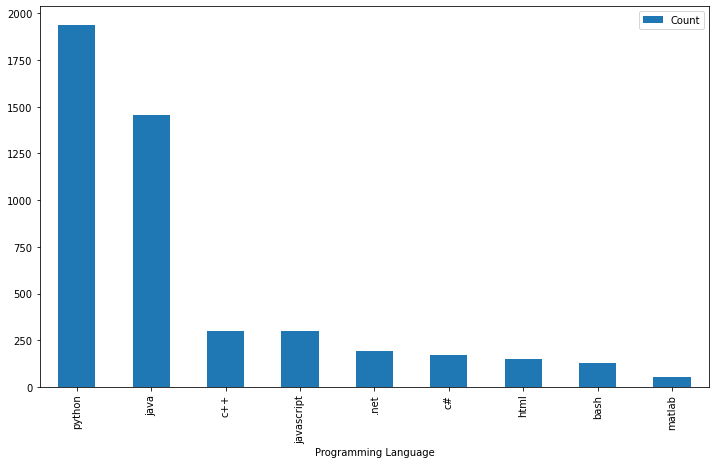

In [505]:
pg_lan_df.plot.bar(figsize=(12,7))

In [506]:
ds_ml_req = ["machine learning","regression","stat","numpy","pandas","data visualization","data analysis"," ai ","nlp","deep learning"]
ds_ml_count = np.zeros(len(ds_ml_req))
def count_skills_ds_ml(skill):
    tmp = data_engineer_jobs['Job Description'].str.lower()
    if skill == 'machine learning':
        return tmp.str.count(skill, flags=re.IGNORECASE).sum() + tmp.str.count(' ml ', flags=re.IGNORECASE).sum()
    elif skill == 'deep learning':
        return tmp.str.count(skill, flags=re.IGNORECASE).sum() + tmp.str.count(' dl ', flags=re.IGNORECASE).sum()
    return tmp.str.count(skill, flags=re.IGNORECASE).sum()

for req in ds_ml_req:
    ds_ml_count[ds_ml_req.index(req)] = count_skills_ds_ml(req)

ds_ml_df = pd.DataFrame([ds_ml_req, ds_ml_count]).T
ds_ml_df = ds_ml_df.rename(columns={0: 'DS/ML skill', 1: 'Count'})
ds_ml_df.sort_values(['Count'], axis=0, ascending=False, inplace=True)
ds_ml_df.set_index('DS/ML skill', inplace=True)
ds_ml_df

,Count
DS/ML skill,
stat,3465.0
machine learning,997.0
data analysis,298.0
data visualization,191.0
ai,145.0
deep learning,112.0
regression,84.0
nlp,60.0
pandas,55.0


<AxesSubplot:xlabel='DS/ML skill'>

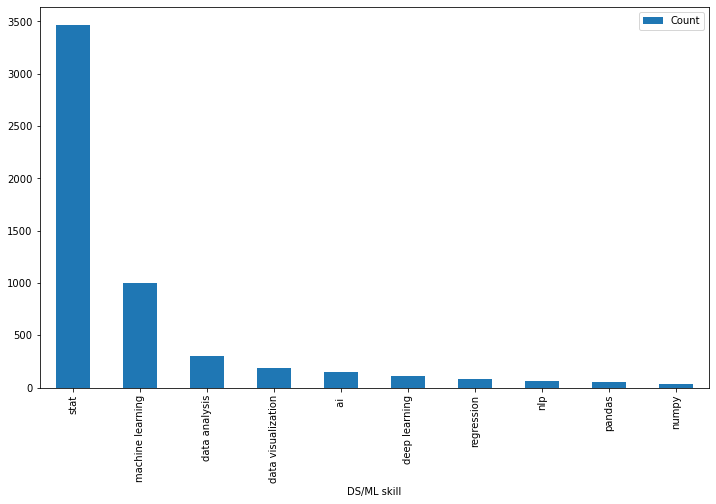

In [507]:
ds_ml_df.plot.bar(figsize=(12,7))

In [508]:
edu_req = ["master","doctorate","bachelor"]
edu_count = np.zeros(len(edu_req))
def count_edu(degree):
    tmp = data_engineer_jobs['Job Description'].str.lower()
    if degree == 'master':
        return tmp.str.count(degree, flags=re.IGNORECASE).sum() + tmp.str.count(' ms ', flags=re.IGNORECASE).sum() \
                + tmp.str.count('m.s', flags=re.IGNORECASE).sum()
    elif degree == 'bachelor':
        return tmp.str.count(degree, flags=re.IGNORECASE).sum() + tmp.str.count(' bs ', flags=re.IGNORECASE).sum() \
                + tmp.str.count('b.s', flags=re.IGNORECASE).sum()
    else:
        return tmp.str.count(degree, flags=re.IGNORECASE).sum() + tmp.str.count('phd', flags=re.IGNORECASE).sum() \
                + tmp.str.count('ph.d', flags=re.IGNORECASE).sum()


for req in edu_req:
    edu_count[edu_req.index(req)] = count_edu(req)

edu_df = pd.DataFrame([edu_req, edu_count]).T
edu_df = edu_df.rename(columns={0: 'Education', 1: 'Count'})
edu_df.sort_values(['Count'], axis=0, ascending=False, inplace=True)
edu_df.set_index('Education', inplace=True)
edu_df

,Count
Education,
bachelor,14144.0
master,8496.0
doctorate,180.0


<AxesSubplot:xlabel='Education'>

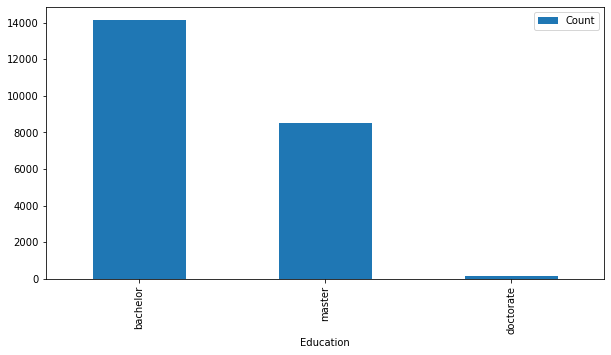

In [509]:
edu_df.plot.bar(figsize=(10,5))

In [510]:
other_skills_req = [" sql ", "nosql", "algorithm", "excel", "sas", "tableau", "power bi", "communication"]
other_skills_count = np.zeros(len(other_skills_req))
def count_other_skills(skill):
    tmp = data_engineer_jobs['Job Description'].str.lower()
    if skill == 'power bi':
        return tmp.str.count(skill, flags=re.IGNORECASE).sum() + tmp.str.count('powerbi', flags=re.IGNORECASE).sum()
    else:
        return tmp.str.count(skill, flags=re.IGNORECASE).sum()

for req in other_skills_req:
    other_skills_count[other_skills_req.index(req)] = count_other_skills(req)

other_skills_df = pd.DataFrame([other_skills_req, other_skills_count]).T
other_skills_df = other_skills_df.rename(columns={0: 'Other skills', 1: 'Count'})
other_skills_df.sort_values(['Count'], axis=0, ascending=False, inplace=True)
other_skills_df.set_index('Other skills', inplace=True)
other_skills_df


,Count
Other skills,
communication,1397.0
sql,1258.0
excel,1179.0
algorithm,512.0
nosql,455.0
tableau,354.0
sas,271.0
power bi,144.0


<AxesSubplot:xlabel='Other skills'>

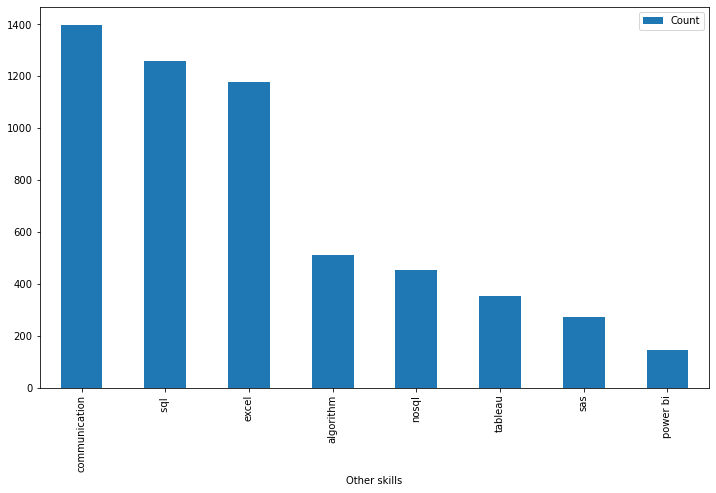

In [511]:
other_skills_df.plot.bar(figsize=(12,7))

### 6 - Mối quan hệ giữa rating và mức lương trung bình?

In [512]:
fig = px.scatter(data_engineer_jobs, x='Rating', y='Salary Upper',color="Rating",\
                hover_data=['Job Title', 'Location', 'Sector','Company Name'], \
                title = "Data Engineer jobs",\
                width=800, height=500)
fig.show()

### 7 - Tìm job theo các tiêu chí cụ thể (title, salary, location, skills, education,...)

Đầu tiên là tạo một bảng mới để tìm job, bảng này chỉ chứa một số cột cần thiết từ data ban đầu, và thêm các cột skills và education được tách ra từ cột Job Description

In [513]:
find_jobs = pd.DataFrame(data=[data_engineer_jobs['Job Title'], data_engineer_jobs['Salary Lower'], data_engineer_jobs['Salary Upper'], data_engineer_jobs['Rating'], data_engineer_jobs['Company Name'], data_engineer_jobs['Location'], data_engineer_jobs['Size'], data_engineer_jobs['Sector']]).T 

#filter

Replace một số từ trong Job Description để thuận tiện trong việc tách cột

In [514]:

description = data_engineer_jobs["Job Description"].replace({'ms': 'master', 'm.s': 'master', 'bs': 'bachelor', 'b.s': 'bachelor', 'phd': 'doctorate','ph.d': 'doctorate','dl': 'deep learning', 'ml': 'machine learning','powerbi': 'power bi'},regex=True)


**Thêm các cột skill và education**

In [515]:
pg_req = ["python", "c++", "java", "matlab", ".net", "c#", "javascript", "html", "bash"]
ds_ml_req = ["machine learning","regression","stat","numpy","pandas","data visualization","data analysis"," ai ","nlp","deep learning"]
edu_req = ["master","bachelor","doctorate"]
other_skills_req = [" sql ", "nosql", "algorithm", "excel", "sas", "tableau", "power bi", "communication"]

In [516]:
def split_des(row,req):
    temp = []
    for i in req:
        if i in row.lower():
            temp.append(i)
    return ", ".join(map(str,temp))


In [517]:
list_language = []
for row in description:
    list_language.append(split_des(row,pg_req))

In [518]:
list_ds_ml = []
for row in description:
    list_ds_ml.append(split_des(row,ds_ml_req))

In [519]:
list_edu = []
for row in description:
    list_edu.append(split_des(row,edu_req))

In [520]:
list_other = []
for row in description:
    list_other.append(split_des(row,other_skills_req))

In [521]:
find_jobs["Language"] = list_language
find_jobs["DS_ML"] = list_ds_ml
find_jobs['Education'] = list_edu
find_jobs['Other skills'] = list_other

In [522]:
#find_jobs

** Thử tìm các job về Software ở bang CA dựa vào các tiêu chí cụ thể**

Đưa tất cả các tiêu chí vào 1 series để dễ quản lý, trong đó location có thể chọn nhập state hoặc thành phố hoặc cả hai. Mỗi dòng là 1 tiêu chí cho 1 cột. Ta có các tiêu chí như tên công việc, nơi làm việc, các ngôn ngữ lập trình, các kỹ năng cần thiết, bằng cấp và mức lương mình muốn. 

In [534]:
quality = {'job': 'Data Engineer', 'location':'NY', 'Language': ['python','.net'], 'DS_ML': ['machine learning', 'deep learning'], 'Education': ['bachelor'], 'Other skills': ['sql','excel'], 'salary': 150}
Quality = pd.Series(data=quality,index=quality.keys())
Quality

job                                 Data Engineer
location                                       NY
Language                           [python, .net]
DS_ML           [machine learning, deep learning]
Education                              [bachelor]
Other skills                         [sql, excel]
salary                                        150
dtype: object

In [535]:
filtering = find_jobs[(find_jobs['Job Title'].str.contains(Quality[0])) & (find_jobs['Location'].str.contains(Quality[1]))]
for i in range(2,len(Quality)-1):
    filtering = pd.concat([filtering[filtering[Quality.index[i]].str.contains(j)] for j in Quality[i]],ignore_index=True)
filtering 

,Job Title,Salary Lower,Salary Upper,Rating,Company Name,Location,Size,Sector,Language,DS_ML,Education,Other skills
0,Senior Data Engineer,80,150,3.3,Aetna,"New York, NY",7.0,Insurance,"python, java","machine learning, stat","master, bachelor","nosql, algorithm, communication"
1,Senior Data Engineer,85,154,3.3,Aetna,"New York, NY",7.0,Insurance,"python, java","machine learning, stat","master, bachelor","nosql, algorithm, communication"
2,Senior Data Engineer,92,117,3.3,Aetna,"New York, NY",7.0,Insurance,"python, java","machine learning, stat","master, bachelor","nosql, algorithm, communication"
3,Senior Data Engineer,80,150,3.0,Affinity Solutions,"New York, NY",2.0,Business Services,python,machine learning,"master, bachelor","nosql, tableau"
4,Senior Data Engineer,85,154,3.0,Affinity Solutions,"New York, NY",2.0,Business Services,python,machine learning,"master, bachelor","nosql, tableau"
...,...,...,...,...,...,...,...,...,...,...,...,...
64,Data Engineer,57,75,3.9,Memorial Sloan-Kettering,"New York, NY",7.0,Health Care,python,"stat, deep learning","master, bachelor","sql , algorithm, excel"
65,Data Engineer,85,154,3.9,Millennium,"New York, NY",5.0,Finance,"python, c++, java","stat, numpy, pandas, data analysis, deep learning","master, bachelor","sql , excel, communication"
66,Data Engineer,85,154,3.6,Nasdaq,"New York, NY",5.0,Finance,"python, java","regression, stat, data analysis, deep learning","master, bachelor","sql , excel, communication"
67,Data Engineer,105,121,5.0,Quantum Search Partners,"New York, NY",1.0,NaN,python,"machine learning, deep learning","master, bachelor","sql , nosql, excel, communication"


In [536]:
list_of_index = []

for i in range(0, len(filtering)):
    if Quality[6] in range(filtering["Salary Lower"][i],filtering["Salary Upper"][i]+1):
        list_of_index.append(i)
filtering.iloc[list_of_index]

,Job Title,Salary Lower,Salary Upper,Rating,Company Name,Location,Size,Sector,Language,DS_ML,Education,Other skills
0,Senior Data Engineer,80,150,3.3,Aetna,"New York, NY",7.0,Insurance,"python, java","machine learning, stat","master, bachelor","nosql, algorithm, communication"
1,Senior Data Engineer,85,154,3.3,Aetna,"New York, NY",7.0,Insurance,"python, java","machine learning, stat","master, bachelor","nosql, algorithm, communication"
3,Senior Data Engineer,80,150,3.0,Affinity Solutions,"New York, NY",2.0,Business Services,python,machine learning,"master, bachelor","nosql, tableau"
4,Senior Data Engineer,85,154,3.0,Affinity Solutions,"New York, NY",2.0,Business Services,python,machine learning,"master, bachelor","nosql, tableau"
6,Data Engineer,85,154,3.8,Bloomberg,"New York, NY",7.0,Information Technology,python,"machine learning, stat, nlp, deep learning","master, bachelor","sql , nosql"
7,Data Engineer,85,154,3.8,Citadel,"New York, NY",5.0,NaN,"python, java, javascript","machine learning, stat","master, bachelor","nosql, communication"
10,Data Engineer,80,150,4.9,Freestar,"New York, NY",1.0,Business Services,"python, java","machine learning, stat, data analysis","master, bachelor","sql , excel, tableau, communication"
17,Data Engineer,80,150,3.3,PA Consulting,"New York, NY",5.0,Business Services,"python, c++, java, javascript, html","machine learning, stat, ai , nlp","master, bachelor","nosql, algorithm, tableau"
18,Data Engineer,80,150,3.7,PepsiCo,"New York, NY",7.0,Manufacturing,"python, java","machine learning, stat, deep learning","master, bachelor","nosql, algorithm"
28,Data Engineer,85,154,3.8,Bloomberg,"New York, NY",7.0,Information Technology,python,"machine learning, stat, nlp, deep learning","master, bachelor","sql , nosql"
